In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# doc tap tin excel employees.xls
# ve barplot voi x=department_id va y=salary

In [4]:
df = pd.read_excel('data/employees.xls')
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17 00:00:00,AD_PRES,24000,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21 00:00:00,AD_VP,17000,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13 00:00:00,AD_VP,17000,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03 00:00:00,IT_PROG,9000,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21 00:00:00,IT_PROG,6000,NaN,103.0,60.0


In [5]:
df = df[['EMPLOYEE_ID','FIRST_NAME','SALARY','DEPARTMENT_ID']]

In [6]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,SALARY,DEPARTMENT_ID
0,100,Steven,24000,90.0
1,101,Neena,17000,90.0
2,102,Lex,17000,90.0
3,103,Alexander,9000,60.0
4,104,Bruce,6000,60.0


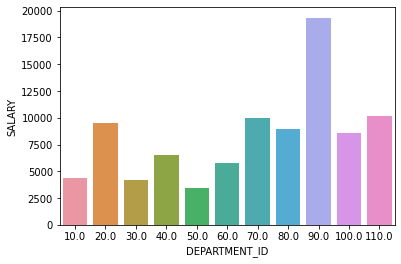

In [8]:
sns.barplot(data=df, x='DEPARTMENT_ID', y='SALARY', ci=None); # trung binh salary

In [9]:
# ve bar plot voi x='DEPARTMENT_ID' va y la SUM(SALARY)
df.groupby('DEPARTMENT_ID').SALARY.sum()

DEPARTMENT_ID
10.0       4400
20.0      19000
30.0      24900
40.0       6500
50.0     156400
60.0      28800
70.0      10000
80.0     304500
90.0      58000
100.0     51608
110.0     20308
Name: SALARY, dtype: int64

In [10]:
df.groupby('DEPARTMENT_ID').SALARY.sum().reset_index()

,DEPARTMENT_ID,SALARY
0,10.0,4400
1,20.0,19000
2,30.0,24900
3,40.0,6500
4,50.0,156400
5,60.0,28800
6,70.0,10000
7,80.0,304500
8,90.0,58000
9,100.0,51608


In [11]:
df.groupby('DEPARTMENT_ID').SALARY.sum().to_frame()

,SALARY
DEPARTMENT_ID,
10.0,4400
20.0,19000
30.0,24900
40.0,6500
50.0,156400
60.0,28800
70.0,10000
80.0,304500
90.0,58000


In [13]:
df_ = df.groupby('DEPARTMENT_ID').SALARY.sum().reset_index()
df_

,DEPARTMENT_ID,SALARY
0,10.0,4400
1,20.0,19000
2,30.0,24900
3,40.0,6500
4,50.0,156400
5,60.0,28800
6,70.0,10000
7,80.0,304500
8,90.0,58000
9,100.0,51608


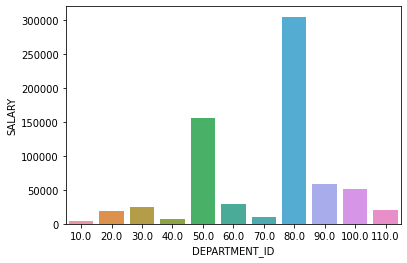

In [14]:
sns.barplot(data=df_, x='DEPARTMENT_ID', y='SALARY');

In [17]:
df_deps = pd.read_excel('data/departments.xls')
df_deps.head(10)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,DEPARTMENT_ID,DEPARTMENT_NAME,MANAGER_ID,LOCATION_ID
0,10,Administration,200.0,1700
1,20,Marketing,201.0,1800
2,30,Purchasing,114.0,1700
3,40,Human Resources,203.0,2400
4,50,Shipping,121.0,1500
5,60,IT,103.0,1400
6,70,Public Relations,204.0,2700
7,80,Sales,145.0,2500
8,90,Executive,100.0,1700
9,100,Finance,108.0,1700


In [20]:
df_ = pd.merge(df_, df_deps[['DEPARTMENT_ID','DEPARTMENT_NAME']])

In [21]:
df_

,DEPARTMENT_ID,SALARY,DEPARTMENT_NAME
0,10.0,4400,Administration
1,20.0,19000,Marketing
2,30.0,24900,Purchasing
3,40.0,6500,Human Resources
4,50.0,156400,Shipping
5,60.0,28800,IT
6,70.0,10000,Public Relations
7,80.0,304500,Sales
8,90.0,58000,Executive
9,100.0,51608,Finance


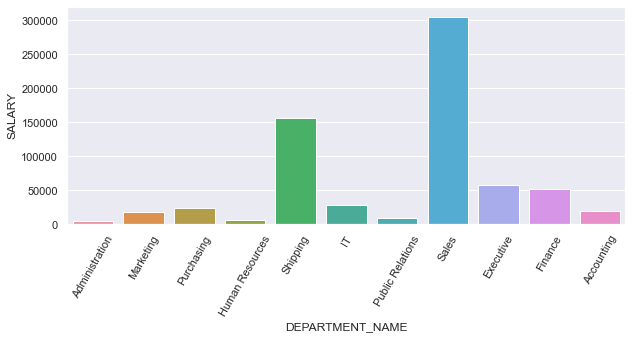

In [26]:
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(data=df_, x='DEPARTMENT_NAME', y='SALARY')
plt.xticks(rotation=60)
plt.show()

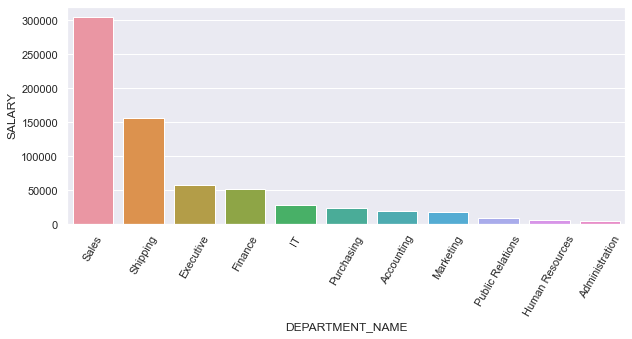

In [27]:
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(data=df_.sort_values(by='SALARY', ascending=False), x='DEPARTMENT_NAME', y='SALARY')
plt.xticks(rotation=60)
plt.show()

In [28]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,SALARY,DEPARTMENT_ID
0,100,Steven,24000,90.0
1,101,Neena,17000,90.0
2,102,Lex,17000,90.0
3,103,Alexander,9000,60.0
4,104,Bruce,6000,60.0


In [31]:
df = pd.merge(df, df_deps[['DEPARTMENT_ID','DEPARTMENT_NAME']])
df.head()

,EMPLOYEE_ID,FIRST_NAME,SALARY,DEPARTMENT_ID,DEPARTMENT_NAME
0,100,Steven,24000,90.0,Executive
1,101,Neena,17000,90.0,Executive
2,102,Lex,17000,90.0,Executive
3,103,Alexander,9000,60.0,IT
4,104,Bruce,6000,60.0,IT


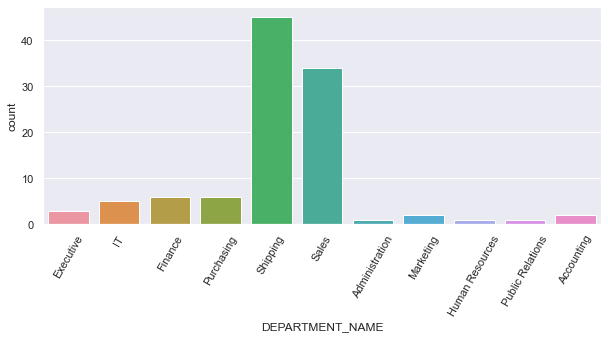

In [33]:
sns.set()
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='DEPARTMENT_NAME')
plt.xticks(rotation=60)
plt.show()

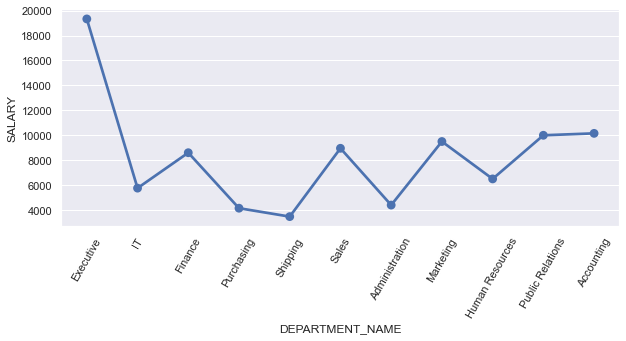

In [34]:
sns.set()
plt.figure(figsize=(10,4))
sns.pointplot(data=df, x='DEPARTMENT_NAME', y='SALARY', ci=None); # trung binh salary
plt.xticks(rotation=60)
plt.show()

In [35]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


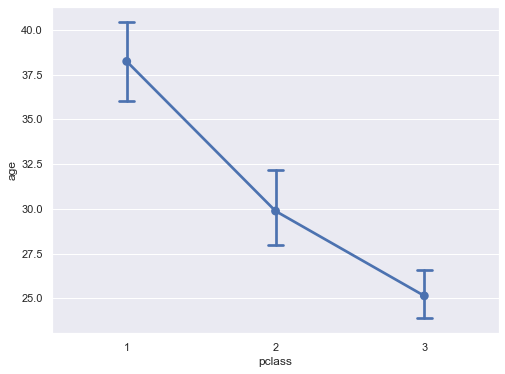

In [36]:
plt.figure(figsize=(8,6))
sns.pointplot(data=titanic, x='pclass', y='age', capsize=0.1)
plt.show()

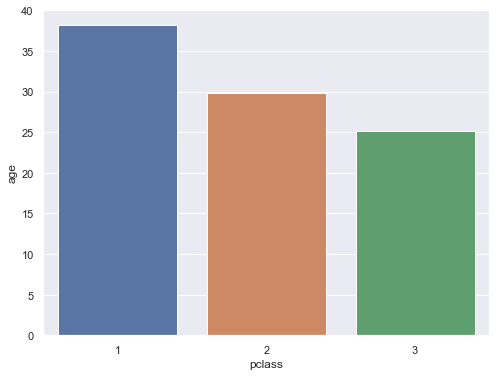

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(data=titanic, x='pclass', y='age', ci=None)
plt.show()

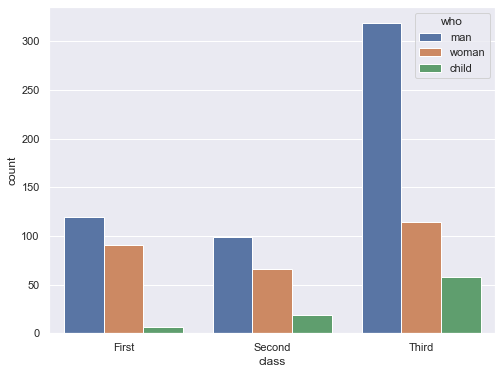

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=titanic, x='class', hue='who')
plt.show()

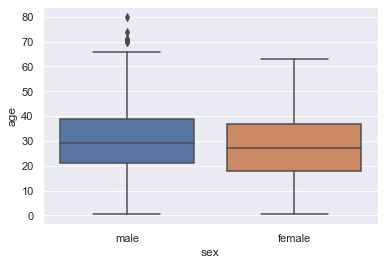

In [41]:
sns.boxplot(data=titanic, x='sex', y='age');

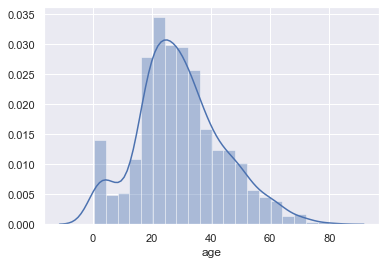

In [43]:
sns.distplot(titanic.age);